In [1]:
import cartopy.feature as cfeature
import xarray as xr 
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import geopandas as gpd 
import xoak

%config InlineBackend.figure_format = "retina"

In [2]:
# From `pixi run hrrr-test`
zarr_path = '../data/weather_data/2020-03-01_2020-03-02_HRRR_data.zarr'
# From HRRR_Downloader.ipynb
#zarr_path = '../data/weather_data/hrrr-test.zarr'

data_zarr = xr.open_zarr(zarr_path)
#data_zarr.unify_chunks()

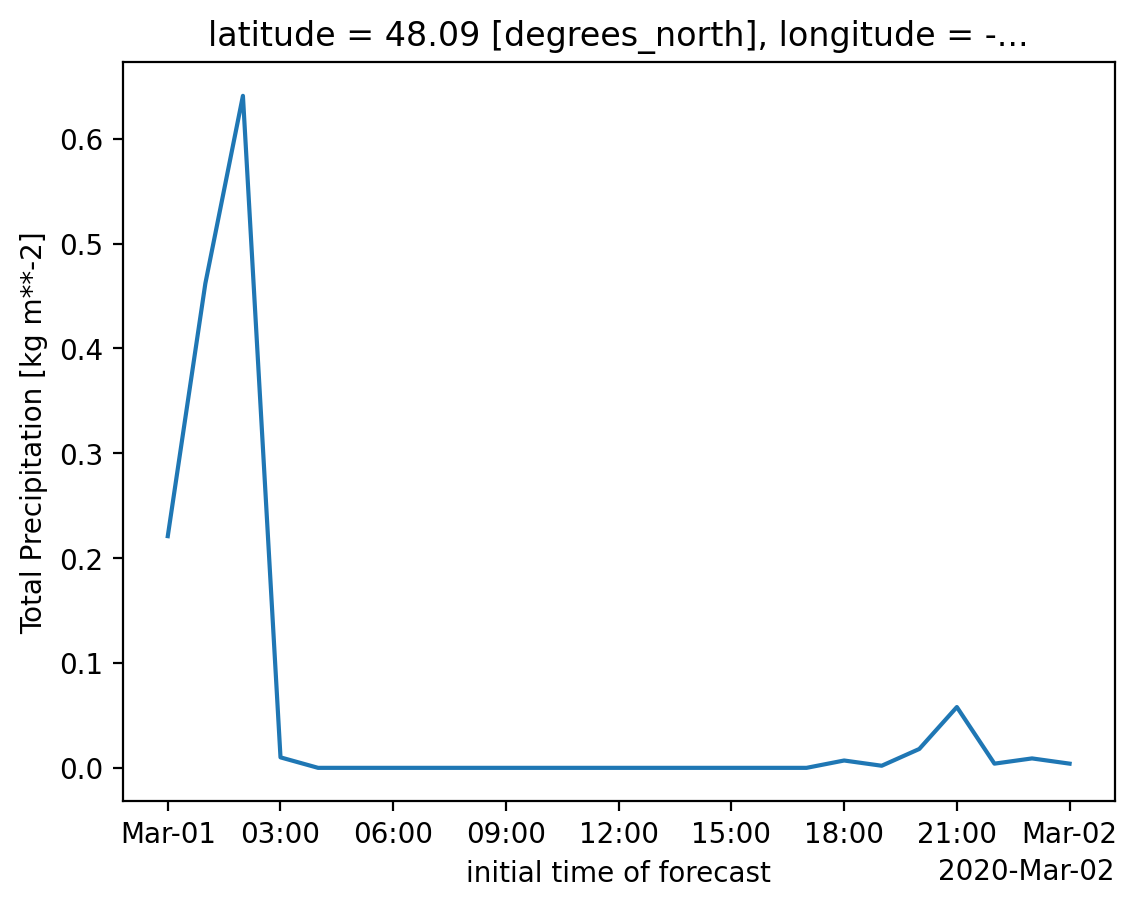

In [3]:
# Plot Glacier Peak Accumulated Precip per hour over period
gl_peak_lat_lon = xr.Dataset(
    {
        "lat": 	48.1048,
        "lon": -121.1124,
    }
)


data_zarr.xoak.set_index(['longitude', 'latitude'], 'sklearn_geo_balltree')
data_zarr.xoak.sel(latitude=gl_peak_lat_lon.lat, longitude=gl_peak_lat_lon.lon).tp.sortby(data_zarr.time).plot();

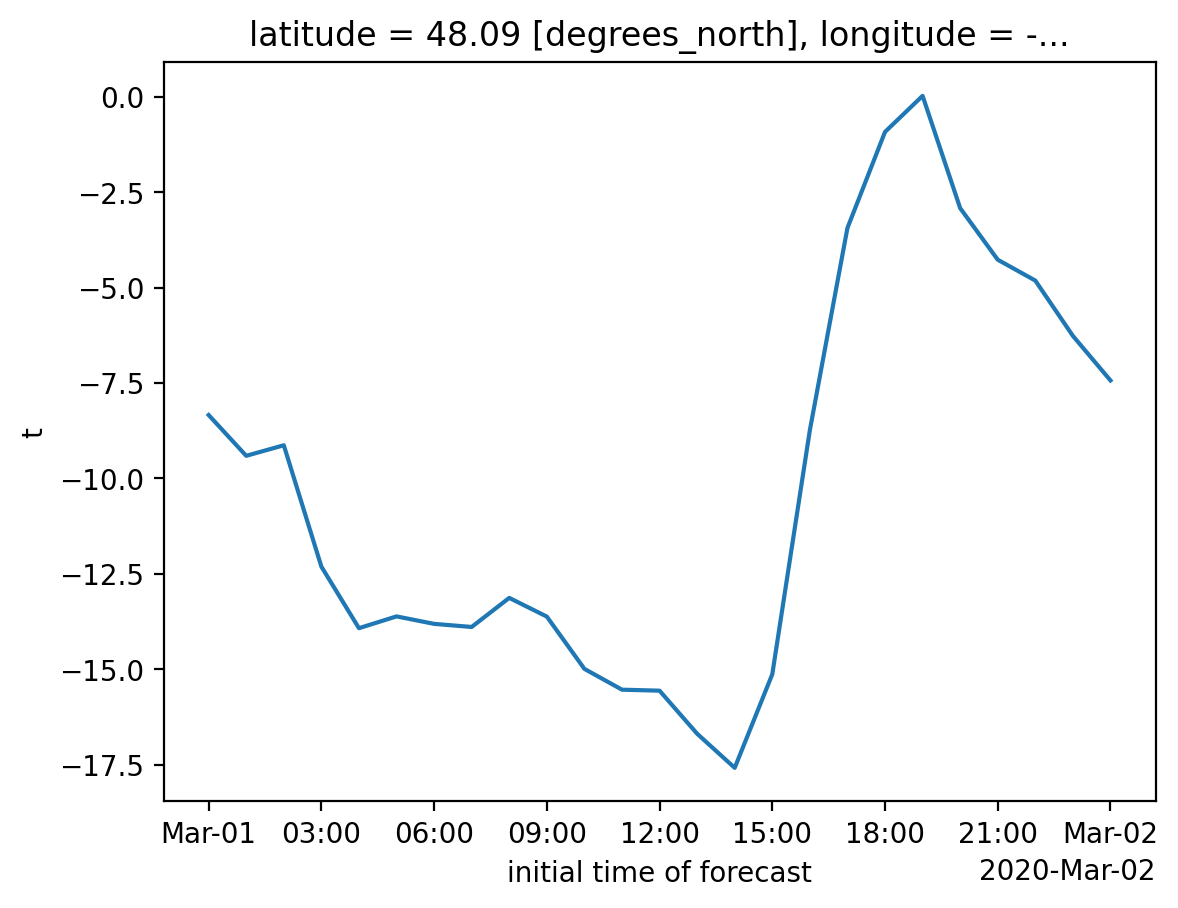

In [4]:
(data_zarr.xoak.sel(latitude=gl_peak_lat_lon.lat, longitude=gl_peak_lat_lon.lon).t - 273.15).sortby(data_zarr.time).plot();

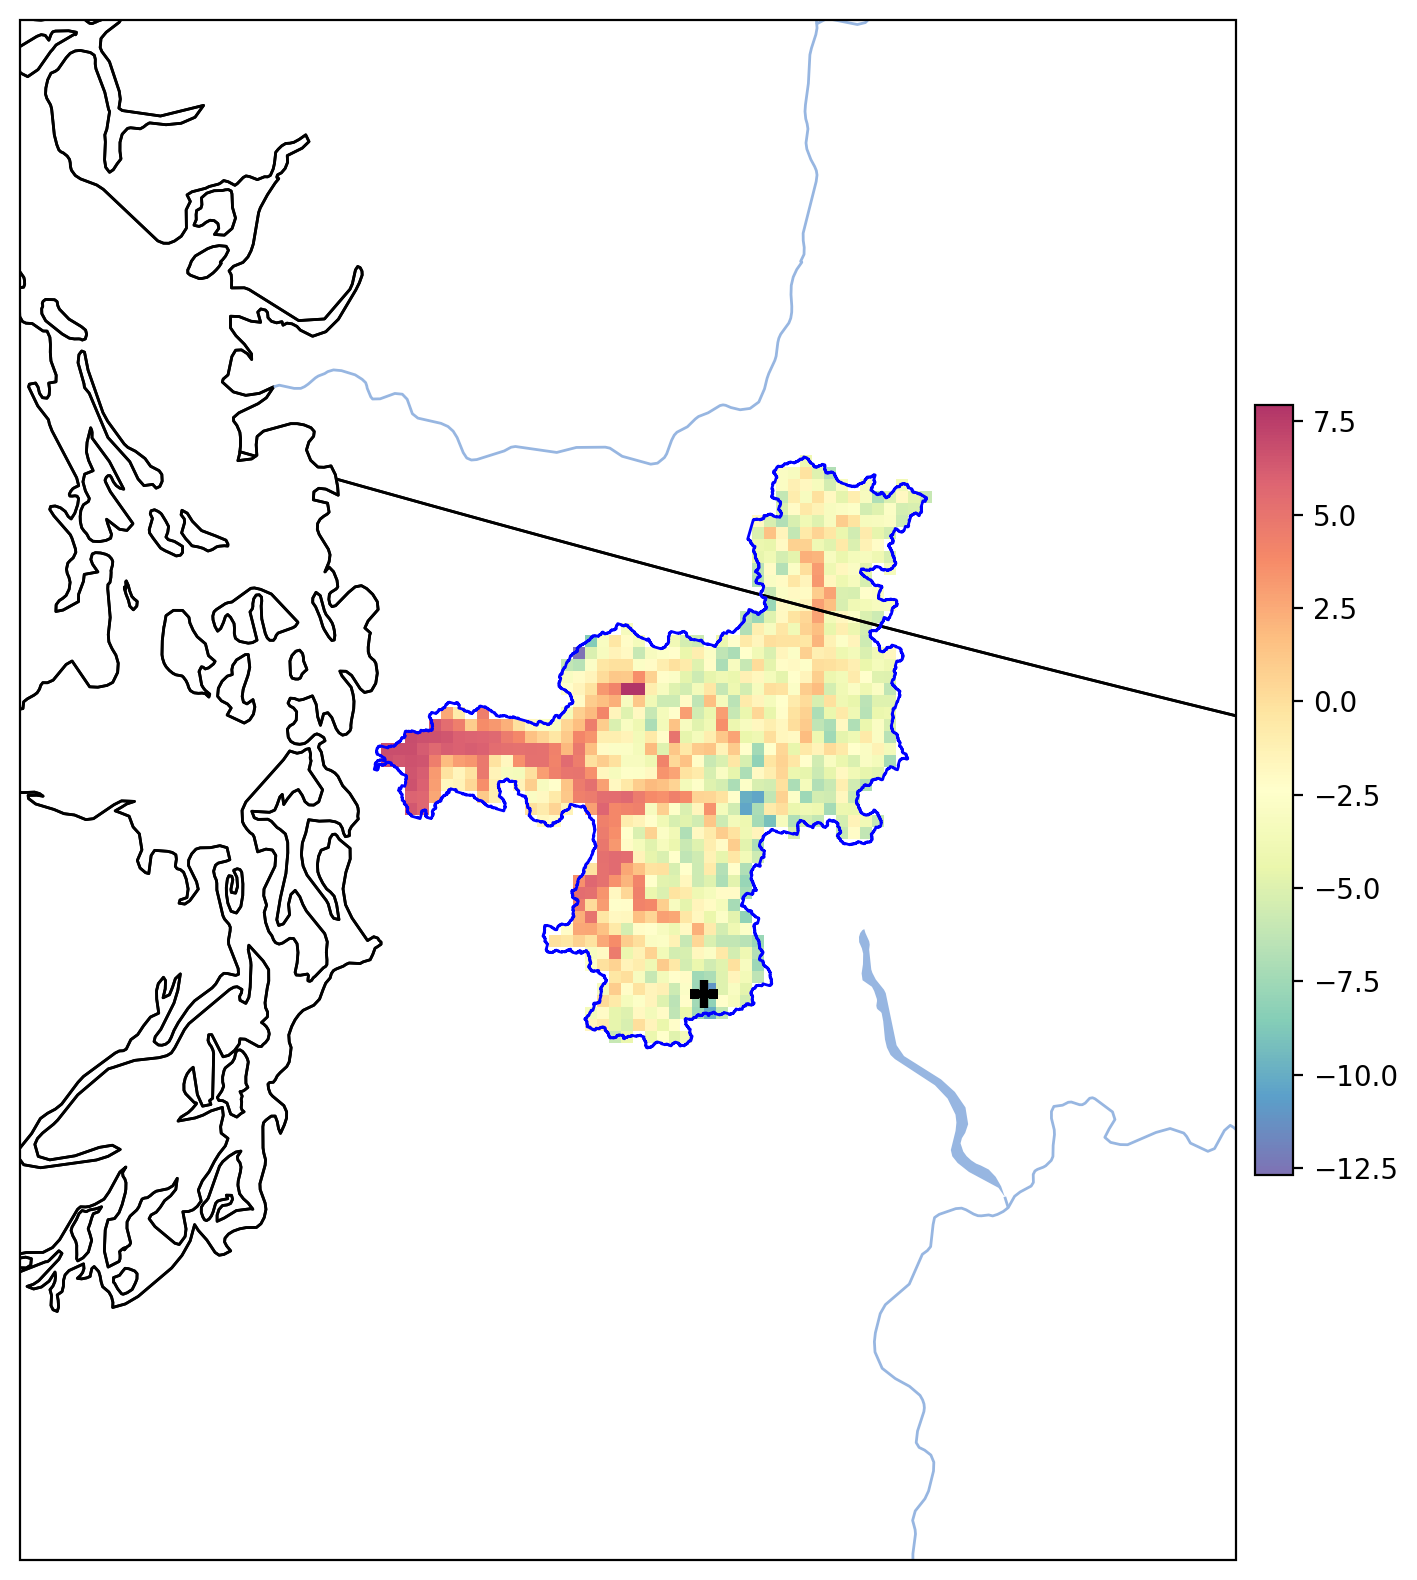

In [5]:
gl_peak_lat_lon = (48.1048, -121.1124)
lats = data_zarr.latitude
lons = data_zarr.longitude

aoi_path = '../data/GIS/SkagitBoundary.json'
mask = gpd.read_file(aoi_path)

projection = ccrs.LambertConformal(central_longitude=262.5, 
                                   central_latitude=38.5, 
                                   standard_parallels=(38.5, 38.5),
                                    globe=ccrs.Globe(semimajor_axis=6371229,
                                                     semiminor_axis=6371229))

# Plot temp at a certain hour/to
fig = plt.figure(figsize=[12, 10])
ax = plt.axes(projection=projection)
D = ax.pcolormesh(lons, lats, data_zarr.t.sel(time='2020-03-02T12:00', method='nearest')-273.15, transform=ccrs.PlateCarree(), cmap='Spectral_r', alpha=.8)
fig.colorbar(D, ax=ax, shrink=.5, pad=.01)
ax.scatter(gl_peak_lat_lon[1], gl_peak_lat_lon[0], transform=ccrs.PlateCarree(), marker='+', s=100, c='k', linewidth=3)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'))
ax.add_feature(cfeature.STATES.with_scale('10m'))
ax.add_feature(cfeature.RIVERS.with_scale('10m'))
ax.add_feature(cfeature.LAKES.with_scale('10m'))
ax.set_extent([-120, -123, 47, 50], crs=ccrs.PlateCarree())
ax.add_geometries([mask.geometry[0]], ccrs.PlateCarree(), edgecolor='blue', facecolor='None');